In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

## Generowanie danych

In [2]:
n = 150
x = np.linspace(-3, 3, n)
y = x**2 +(3 * np.random.rand(n) - 1.5)

## Przygotowanie środowiska do wykresów

In [3]:
def plt_customization():
    params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'xx-large',
             'axes.titlesize':'xx-large',
             'xtick.labelsize':'xx-large',
             'ytick.labelsize':'xx-large',
             'axes.facecolor':'white'}
    plt.rcParams.update(params)

plt_customization()

## Wizualizacja wygenerowanych danych

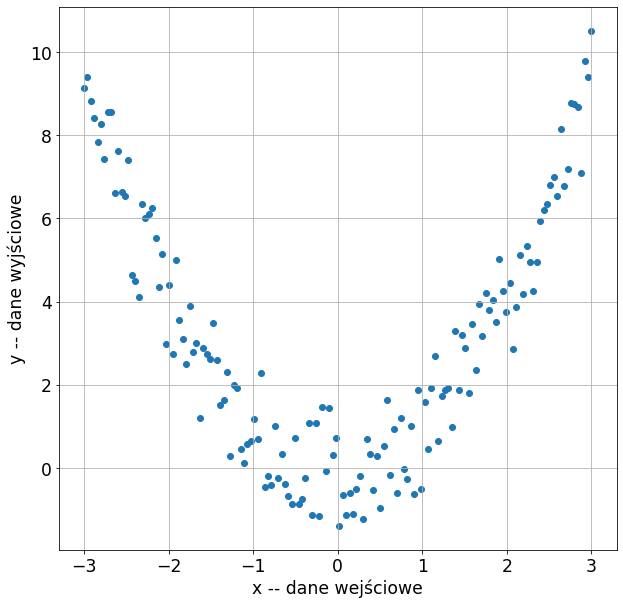

In [4]:
plt.figure(figsize=(10,10),
          facecolor='white')
plt.scatter(x, y)
plt.xlabel('x -- dane wejściowe')
plt.ylabel('y -- dane wyjściowe')
plt.grid()

## Predykcja z wykorzystaniem drzewa decyzyjnego

In [5]:
max_depth = None
min_samples_leaf = 5

X = x.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf)
model.fit(X, y)
y_predict = model.predict(X)

## Wizualizacja predykcji

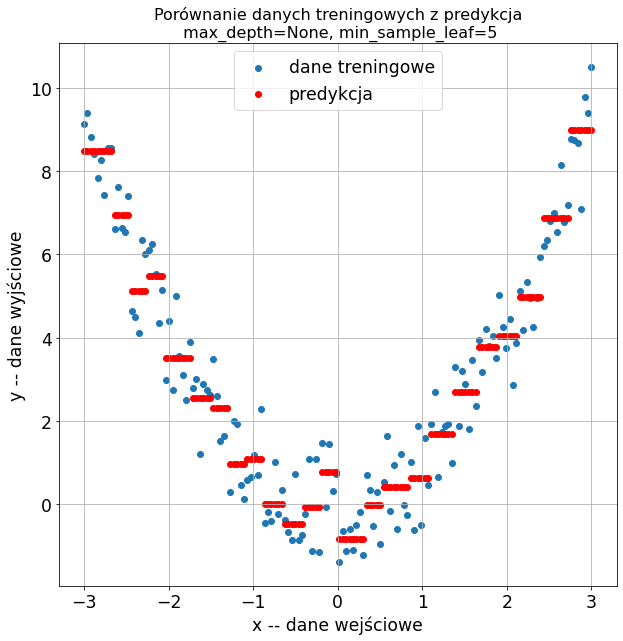

In [6]:
def prediction_plot(x, y_true, y_pred):
    plt.figure(figsize=(10,10), facecolor='white')

    plt.scatter(x, y_true, label='dane treningowe')
    plt.scatter(x, y_predict, label='predykcja', color='red')
    plt.legend(loc='upper center')
    plt.xlabel('x -- dane wejściowe')
    plt.ylabel('y -- dane wyjściowe')
    plt.title('Porównanie danych treningowych z predykcja\n max_depth={}, min_sample_leaf={}'.format(max_depth, min_samples_leaf),
             fontsize=16)
    plt.grid()
    
prediction_plot(x, y, y_predict)

# Metryki

### Max error

In [7]:
from sklearn.metrics import max_error

max_error(y, y_predict)

1.9064357044255562

### Mean absolute error

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_predict)

0.5627989959518408

### Median absolute error

In [9]:
from sklearn.metrics import median_absolute_error

median_absolute_error(y, y_predict)

0.4542841196124713

### Mean squared error

In [10]:
from sklearn.metrics import mean_squared_error

print( mean_squared_error(y, y_predict) )
print( mean_squared_error(y, y_predict, squared=False) )

0.46560991675096197
0.682356150958546


### $R^2$

In [11]:
from sklearn.metrics import r2_score

r2_score( y, y_predict)


0.9497155397010584

### Definicja funkcji obliczającej metryki

In [12]:
def metrics_calc(y_true, y_pred):
    print("max_error = {:5.3f}".format(max_error(y_true, y_pred) ))
    print("MAE       = {:5.3f}".format(mean_absolute_error(y_true, y_pred)))
    print("MedAE     = {:5.3f}".format(median_absolute_error(y_true, y_pred)))
    print("MSE       = {:5.3f}".format(mean_squared_error(y_true, y_predict)))
    print("RMSE      = {:5.3f}".format(mean_squared_error(y_true, y_predict, squared=False)))
    print("R2        = {:5.3f}".format(r2_score(y_true, y_predict)))

In [13]:
metrics_calc(y, y_predict)

max_error = 1.906
MAE       = 0.563
MedAE     = 0.454
MSE       = 0.466
RMSE      = 0.682
R2        = 0.950


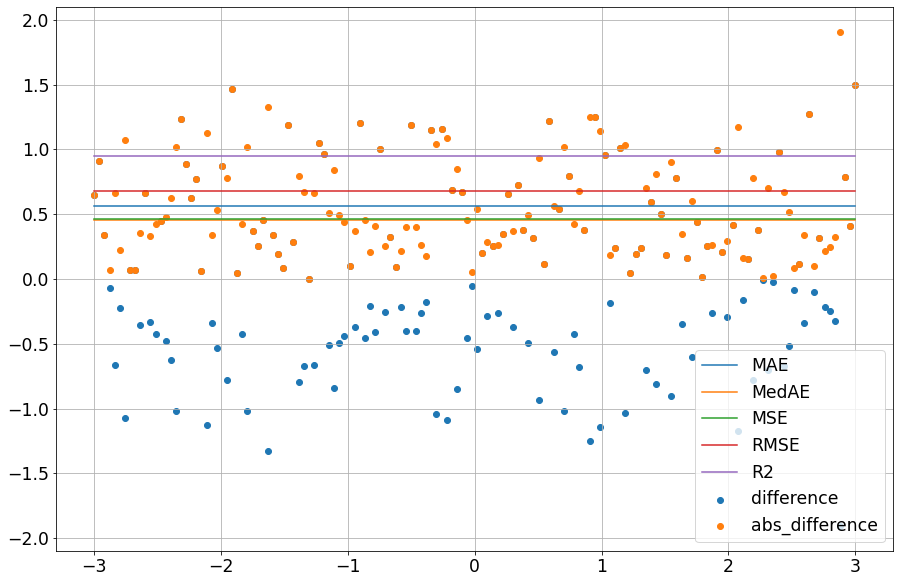

In [14]:
def metrics_plot(y_true, y_predict):

    plt.figure(figsize=(15,10), facecolor='white')

    plt.scatter(x, y - y_predict, label='difference')
    plt.scatter(x, np.abs(y - y_predict), label='abs_difference')
    plt.plot(x, np.ones(len(x))*mean_absolute_error(y_true, y_predict), label='MAE')
    plt.plot(x, np.ones(len(x))*median_absolute_error(y_true, y_predict), label='MedAE')
    plt.plot(x, np.ones(len(x))*mean_squared_error(y_true, y_predict), label='MSE')
    plt.plot(x, np.ones(len(x))*mean_squared_error(y_true, y_predict, squared=False), label='RMSE')
    plt.plot(x, np.ones(len(x))*r2_score(y_true, y_predict), label='R2')

    plt.legend()
    plt.grid()

metrics_plot(y, y_predict)

### Zmiana parametrów predykcji

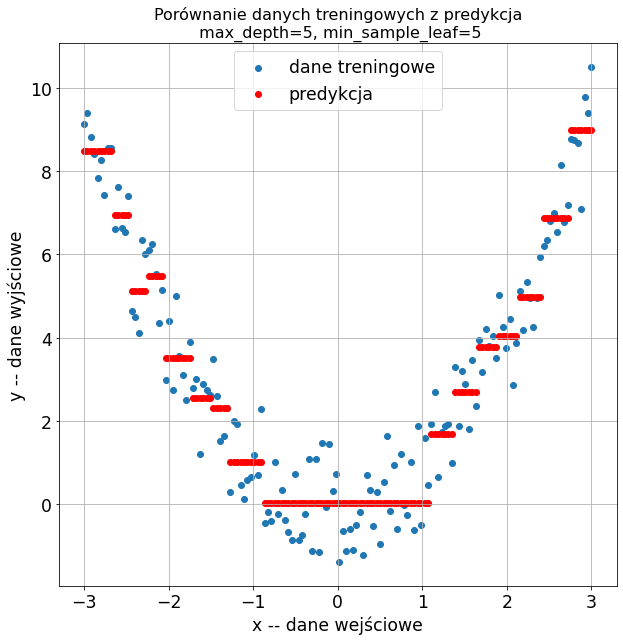

In [15]:
max_depth = 5
min_samples_leaf = 5

X = x.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf)
model.fit(X, y)
y_predict = model.predict(X)

prediction_plot(X, y, y_predict)

max_error = 1.906
MAE       = 0.616
MedAE     = 0.532
MSE       = 0.558
RMSE      = 0.747
R2        = 0.940


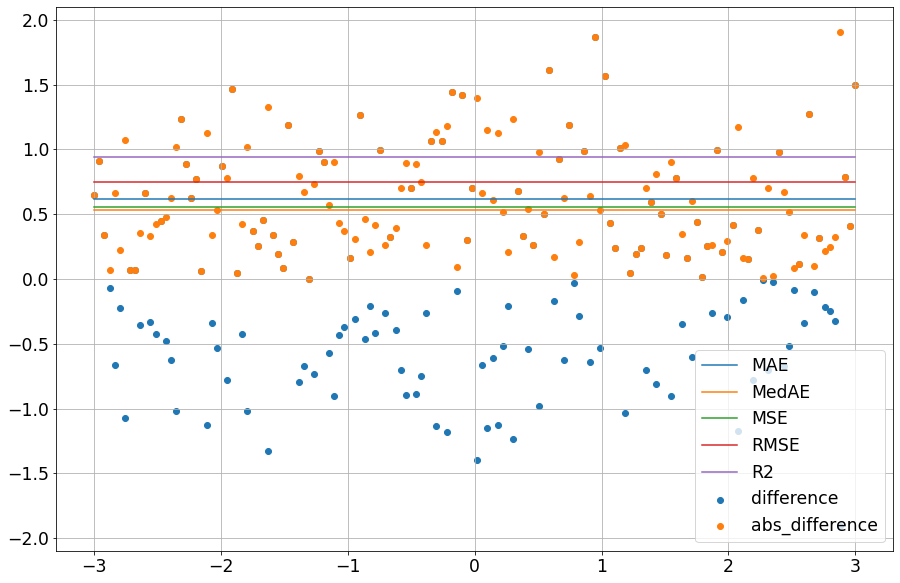

In [16]:
metrics_calc(y, y_predict)
metrics_plot(y, y_predict)

In [17]:
max_depth = None
min_samples_leaf = 5

X = x.reshape(-1, 1)

model = RandomForestRegressor(max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf,
                              n_estimators=1000,
                              n_jobs=8,
                             )
model.fit(X, y)
y_predict = model.predict(X)

max_error = 2.066
MAE       = 0.586
MedAE     = 0.518
MSE       = 0.499
RMSE      = 0.706
R2        = 0.946


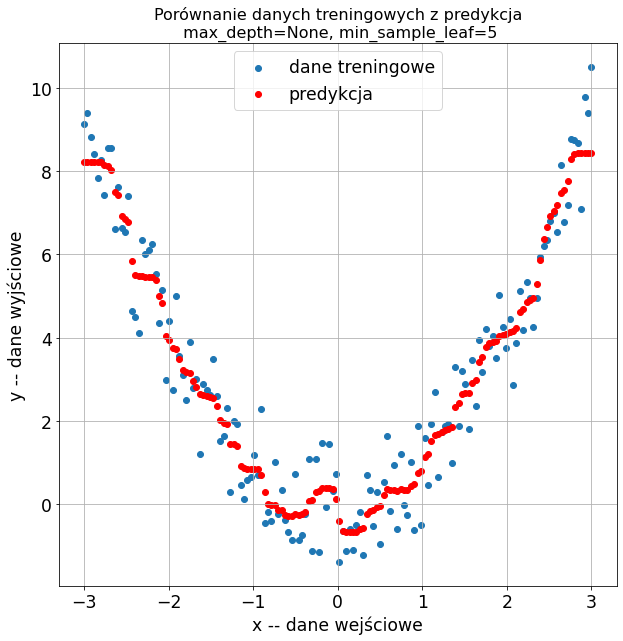

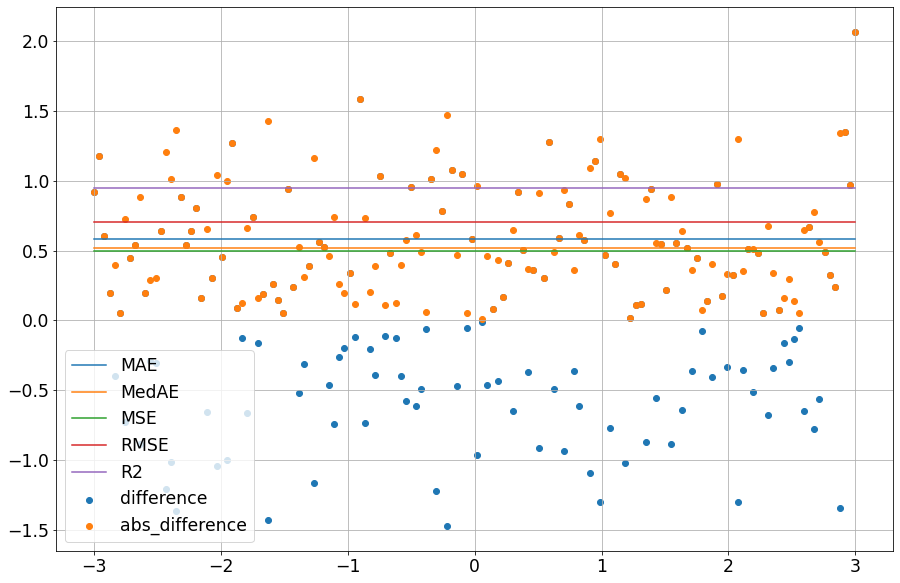

In [18]:
prediction_plot(X, y, y_predict)
metrics_calc(y, y_predict)
metrics_plot(y, y_predict)

In [19]:
max_depth = None
min_samples_leaf = 3

X = x.reshape(-1, 1)

model = RandomForestRegressor(max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf,
                              n_estimators=1000,
                              n_jobs=8,
                             )
model.fit(X, y)
y_predict = model.predict(X)

max_error = 1.678
MAE       = 0.530
MedAE     = 0.468
MSE       = 0.411
RMSE      = 0.641
R2        = 0.956


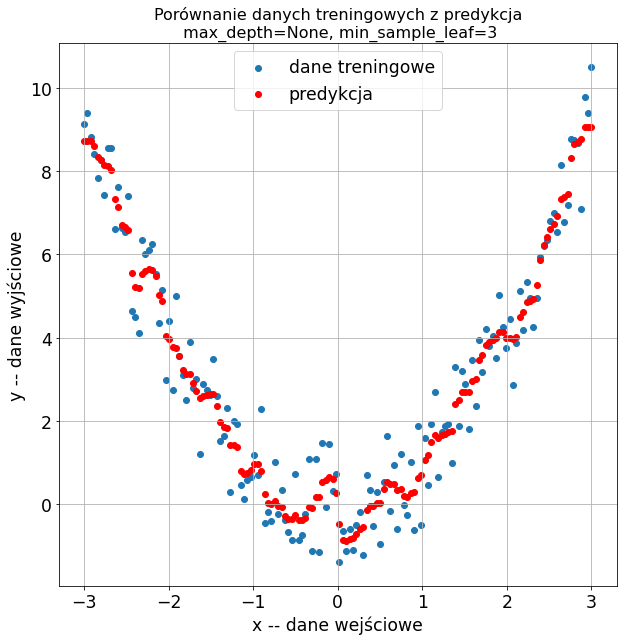

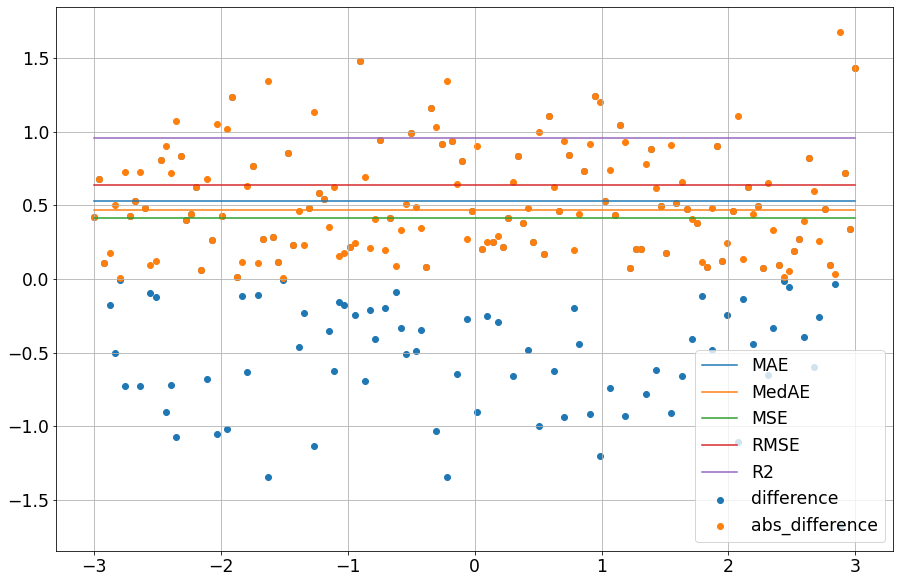

In [20]:
prediction_plot(X, y, y_predict)
metrics_calc(y, y_predict)
metrics_plot(y, y_predict)

In [21]:
import xgboost as xgb

max_depth = 4

X = x.reshape(-1, 1)

model = xgb.XGBRegressor(max_depth=max_depth,
                     n_estimators=100,
                     n_jobs=8)
model.fit(X, y)
y_predict = model.predict(X)

max_error = 0.458
MAE       = 0.173
MedAE     = 0.176
MSE       = 0.042
RMSE      = 0.205
R2        = 0.995


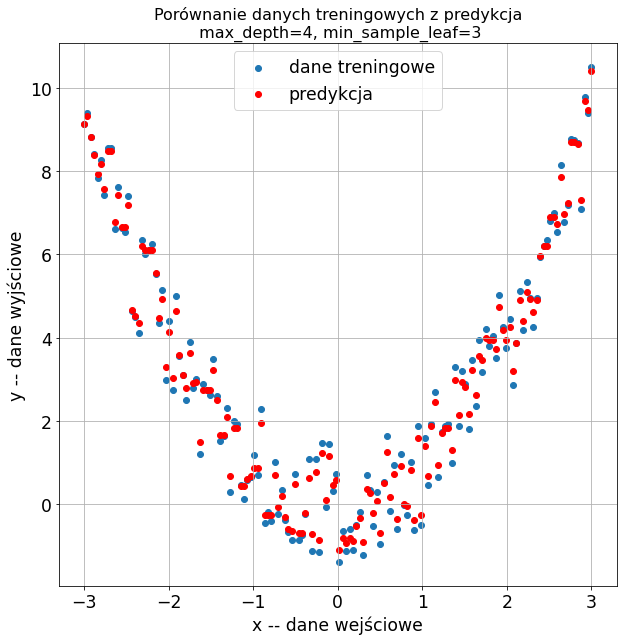

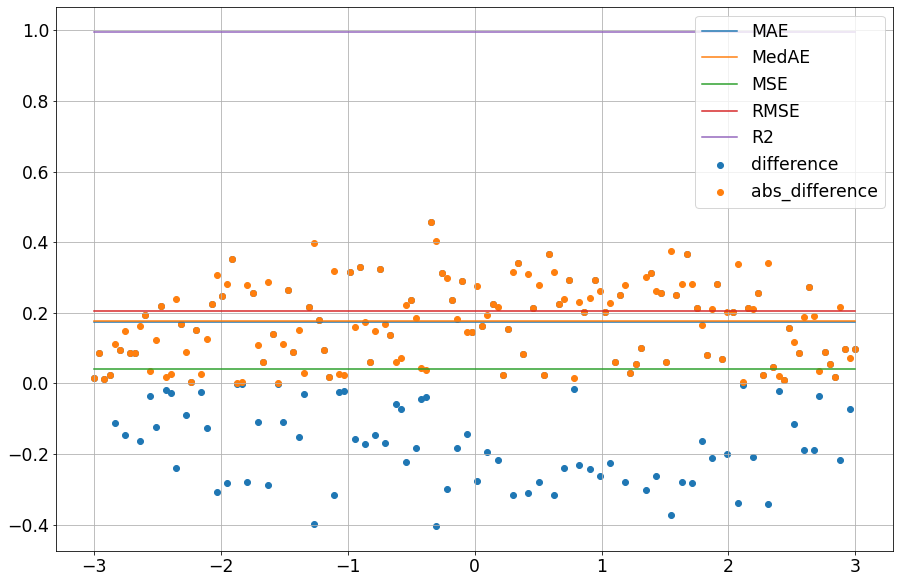

In [22]:
prediction_plot(X, y, y_predict)
metrics_calc(y, y_predict)
metrics_plot(y, y_predict)